# Outliers and missing values

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Plotting
import seaborn as sns

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/preprocessed_airquality.csv")
dataset.head().T

0             1             2             3             4
year             2013          2013          2013          2013          2013
month               3             3             3             3             3
day                 1             1             1             1             1
hour                0             1             2             3             4
PM25              4.0           8.0           7.0           6.0           3.0
PM10              4.0           8.0           7.0           6.0           3.0
SO2               4.0           4.0           5.0          11.0          12.0
NO2               7.0           7.0          10.0          11.0          12.0
CO              300.0         300.0         300.0         300.0         300.0
O3               77.0          77.0          73.0          72.0          72.0
TEMP             -0.7          -1.1          -1.1          -1.4          -2.0
PRES           1023.0        1023.2        1023.5        1024.5        1025.2
DEWP            -18.8         -18.2         -18.2         -19.4         -19.5
RAIN              0.0           0.0           0.0           0.0           0.0
wd                NNW             N           NNW            NW             N
WSPM              4.4           4.7           5.6           3.1           2.0
station  Aotizhongxin  Aotizhongxin  Aotizhongxin  Aotizhongxin  Aotizhongxin

<a id="outliers"></a>
## Outliers

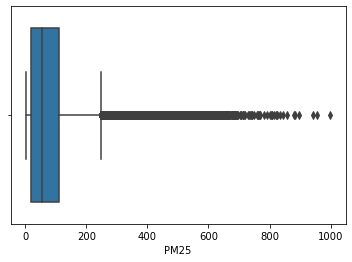

In [4]:
pm_25 = sns.boxplot(dataset["PM25"])

In [5]:
(dataset["PM25"] >= 250).sum()

18668

In [6]:
pm25 = dataset.loc[dataset["PM25"] >= 250]
pm25.head()

year  month  day  hour   PM25   PM10    SO2    NO2      CO    O3  TEMP  \
120  2013      3    6     0  284.0  315.0  133.0  174.0  4000.0  28.0   4.9   
121  2013      3    6     1  272.0  300.0  131.0  166.0  4000.0  22.0   4.8   
140  2013      3    6    20  254.0  396.0  107.0  154.0  4200.0  17.0   4.4   
141  2013      3    6    21  266.0  380.0  117.0  159.0  3799.0  17.0   3.8   
142  2013      3    6    22  254.0  335.0  111.0  148.0  4099.0  17.0   2.4   

       PRES  DEWP  RAIN   wd  WSPM       station  
120  1008.5  -6.4   0.0   NE   1.2  Aotizhongxin  
121  1008.3  -5.9   0.0   NE   1.5  Aotizhongxin  
140  1008.2  -2.5   0.0  SSW   1.1  Aotizhongxin  
141  1007.7  -2.2   0.0  WSW   1.9  Aotizhongxin  
142  1007.3  -2.5   0.0  WSW   1.2  Aotizhongxin

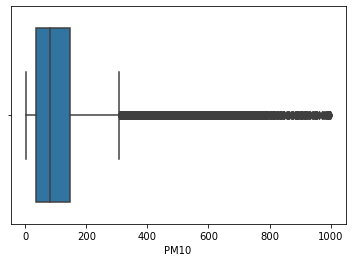

In [7]:
pm_10 = sns.boxplot(dataset.PM10)

In [8]:
pm10 = dataset.loc[dataset["PM10"] >= 320]
pm10.head()

year  month  day  hour   PM25   PM10    SO2    NO2      CO    O3  TEMP  \
139  2013      3    6    19  242.0  338.0  124.0  164.0  3700.0  17.0   5.1   
140  2013      3    6    20  254.0  396.0  107.0  154.0  4200.0  17.0   4.4   
141  2013      3    6    21  266.0  380.0  117.0  159.0  3799.0  17.0   3.8   
142  2013      3    6    22  254.0  335.0  111.0  148.0  4099.0  17.0   2.4   
143  2013      3    6    23  260.0  360.0  119.0  145.0  4000.0  17.0   2.3   

       PRES  DEWP  RAIN   wd  WSPM       station  
139  1007.6  -2.5   0.0  WSW   1.2  Aotizhongxin  
140  1008.2  -2.5   0.0  SSW   1.1  Aotizhongxin  
141  1007.7  -2.2   0.0  WSW   1.9  Aotizhongxin  
142  1007.3  -2.5   0.0  WSW   1.2  Aotizhongxin  
143  1007.2  -2.4   0.0  NNE   1.3  Aotizhongxin

In [9]:
(dataset["PM10"] >= 320).sum()

12865

In [10]:
dataset.loc[(dataset["PM25"] >= 250) & (dataset["PM10"] >= 320)]

year  month  day  hour   PM25   PM10    SO2    NO2      CO    O3  \
140     2013      3    6    20  254.0  396.0  107.0  154.0  4200.0  17.0   
141     2013      3    6    21  266.0  380.0  117.0  159.0  3799.0  17.0   
142     2013      3    6    22  254.0  335.0  111.0  148.0  4099.0  17.0   
143     2013      3    6    23  260.0  360.0  119.0  145.0  4000.0  17.0   
149     2013      3    7     5  275.0  337.0   46.0  103.0  5599.0  17.0   
...      ...    ...  ...   ...    ...    ...    ...    ...     ...   ...   
420187  2017      2    4    19  409.0  409.0   56.0  159.0   400.0  10.0   
420188  2017      2    4    20  389.0  389.0   42.0  153.0   400.0   7.0   
420358  2017      2   11    22  259.0  369.0   75.0  108.0  1500.0  76.0   
420359  2017      2   11    23  303.0  410.0   92.0  109.0  1700.0   2.0   
420360  2017      2   12     0  350.0  388.0   96.0  106.0  2300.0   2.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
140      4.4  1008.2  -2.5   0.0  SSW   1.1   Aotizhongxin  
141      3.8  1007.7  -2.2   0.0  WSW   1.9   Aotizhongxin  
142      2.4  1007.3  -2.5   0.0  WSW   1.2   Aotizhongxin  
143      2.3  1007.2  -2.4   0.0  NNE   1.3   Aotizhongxin  
149      1.6  1006.7  -1.5   0.0  NNE   1.7   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
420187   7.1  1013.5  -8.1   0.0  WNW   2.4  Wanshouxigong  
420188   7.7  1014.1 -10.2   0.0   NW   3.0  Wanshouxigong  
420358  -1.7  1023.6 -13.9   0.0  ENE   0.9  Wanshouxigong  
420359  -1.9  1023.5 -14.0   0.0    N   0.8  Wanshouxigong  
420360  -3.2  1023.6 -12.9   0.0   NE   1.1  Wanshouxigong  

[10047 rows x 17 columns]

In [11]:
((dataset["PM25"] >= 250) & (dataset["PM10"] >= 320)).sum()

10047

In [12]:
dataset.describe().T

count         mean          std        min      25%     50%  \
year   420768.0  2014.662560     1.177198  2013.0000  2014.00  2015.0   
month  420768.0     6.522930     3.448707     1.0000     4.00     7.0   
day    420768.0    15.729637     8.800102     1.0000     8.00    16.0   
hour   420768.0    11.500000     6.922195     0.0000     5.75    11.5   
PM25   412029.0    79.793428    80.822391     2.0000    20.00    55.0   
PM10   414319.0   104.602618    91.772426     2.0000    36.00    82.0   
SO2    411747.0    15.830835    21.650603     0.2856     3.00     7.0   
NO2    408652.0    50.638586    35.127912     1.0265    23.00    43.0   
CO     400067.0  1230.766454  1160.182716   100.0000   500.00   900.0   
O3     407491.0    57.372271    56.661607     0.2142    11.00    45.0   
TEMP   420370.0    13.538976    11.436139   -19.9000     3.10    14.5   
PRES   420375.0  1010.746982    10.474055   982.4000  1002.30  1010.4   
DEWP   420365.0     2.490822    13.793847   -43.4000    -8.90     3.1   
RAIN   420378.0     0.064476     0.821004     0.0000     0.00     0.0   
WSPM   420450.0     1.729711     1.246386     0.0000     0.90     1.4   

           75%      max  
year   2016.00   2017.0  
month    10.00     12.0  
day      23.00     31.0  
hour     17.25     23.0  
PM25    111.00    999.0  
PM10    145.00    999.0  
SO2      20.00    500.0  
NO2      71.00    290.0  
CO     1500.00  10000.0  
O3       82.00   1071.0  
TEMP     23.30     41.6  
PRES   1019.00   1042.8  
DEWP     15.10     29.1  
RAIN      0.00     72.5  
WSPM      2.20     13.2

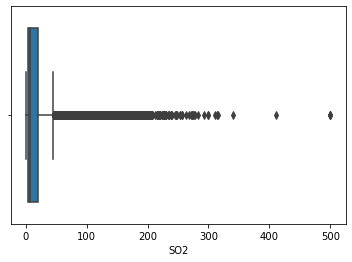

In [13]:
so2 = sns.boxplot(dataset.SO2)

In [14]:
(dataset["SO2"] >= 70).sum()

14571

In [15]:
(
    (dataset["PM25"] >= 250)
    & (dataset["PM10"] >= 320)
    & (dataset["SO2"] >= 70)
).sum()

2297

In [16]:
(dataset["SO2"] >= 300).sum()

9

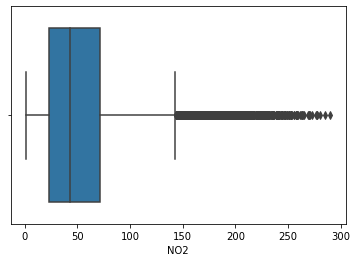

In [17]:
no2 = sns.boxplot(dataset.NO2)

In [18]:
(dataset["NO2"] >= 150).sum()

5502

In [19]:
(
    (dataset["PM25"] >= 250)
    & (dataset["PM10"] >= 320)
    & (dataset["SO2"] >= 200)
    & (dataset["NO2"] >= 150).sum()
).sum()

0

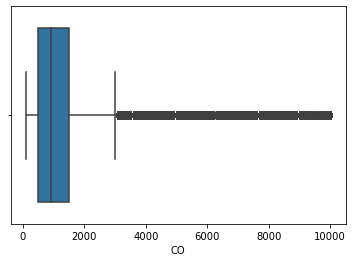

In [20]:
co = sns.boxplot(dataset.CO)

In [21]:
(dataset["CO"] >= 3000).sum()

30355

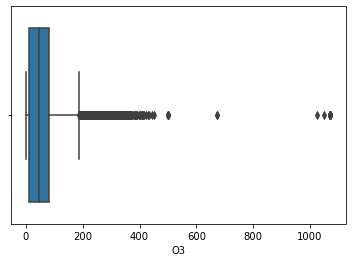

In [22]:
o3 = sns.boxplot(dataset.O3)

In [23]:
(dataset["O3"] >= 200).sum()

13358

In [24]:
(dataset["O3"] >= 470).sum()

24

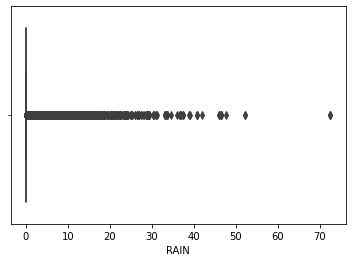

In [25]:
rain = sns.boxplot(dataset.RAIN)

<AxesSubplot:xlabel='station', ylabel='PM25'>

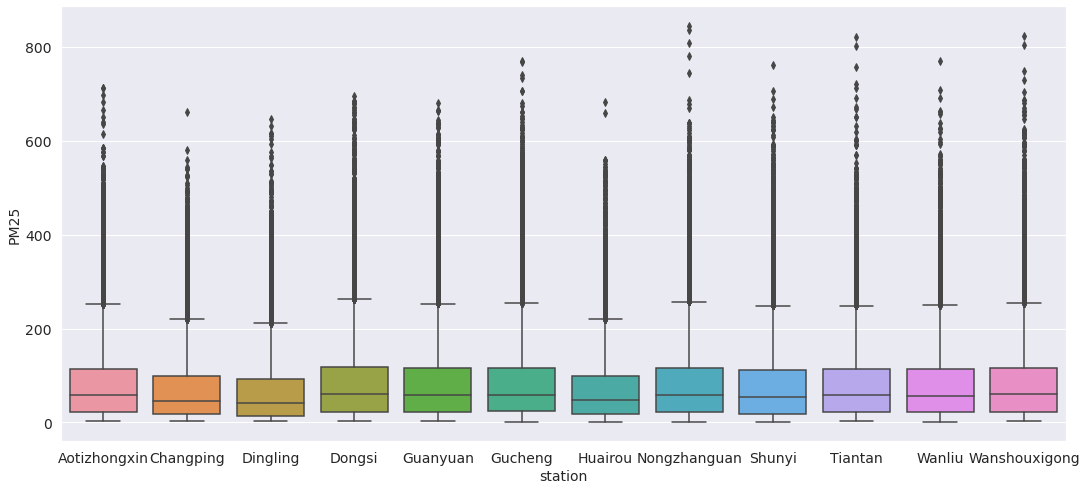

In [26]:
colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.set(
    rc={
        "figure.figsize": (18, 8),
        # "axes.titlesize" : 18,
        "axes.labelsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
    }
)

sns.boxplot(x="station", y="PM25", data=dataset.dropna(axis=0).reset_index())

<AxesSubplot:xlabel='station', ylabel='PM10'>

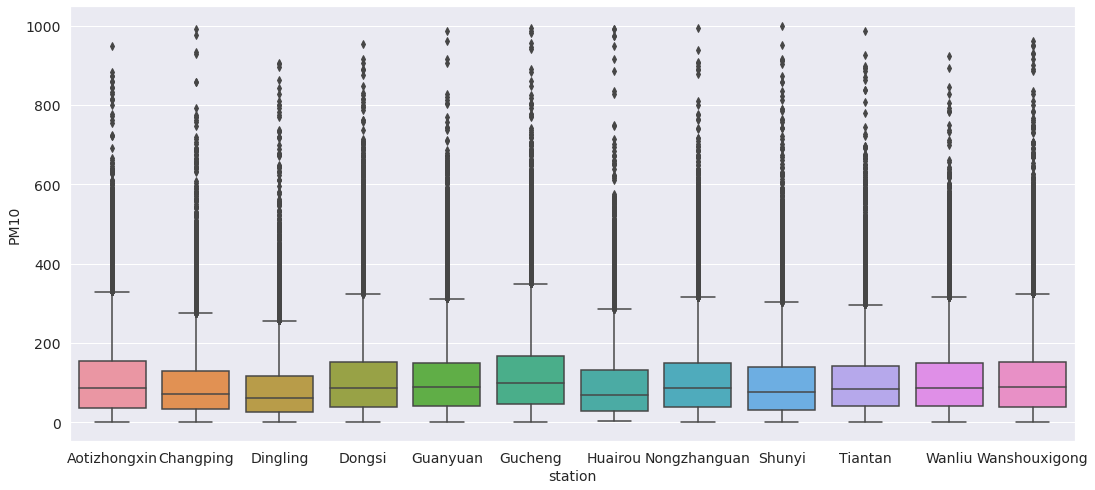

In [27]:
sns.boxplot(x="station", y="PM10", data=dataset.dropna(axis=0).reset_index())

<AxesSubplot:xlabel='station', ylabel='SO2'>

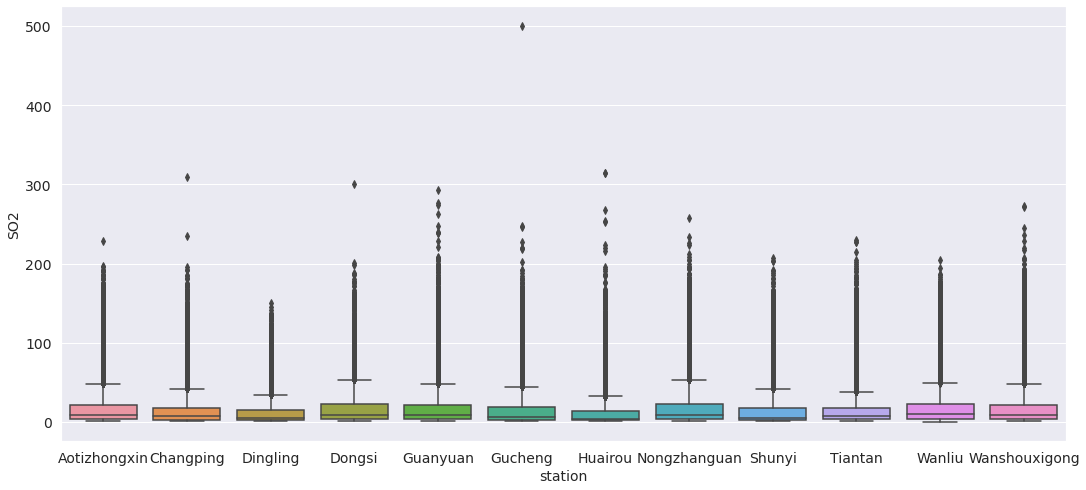

In [28]:
sns.boxplot(x="station", y="SO2", data=dataset.dropna(axis=0).reset_index())

<AxesSubplot:xlabel='station', ylabel='NO2'>

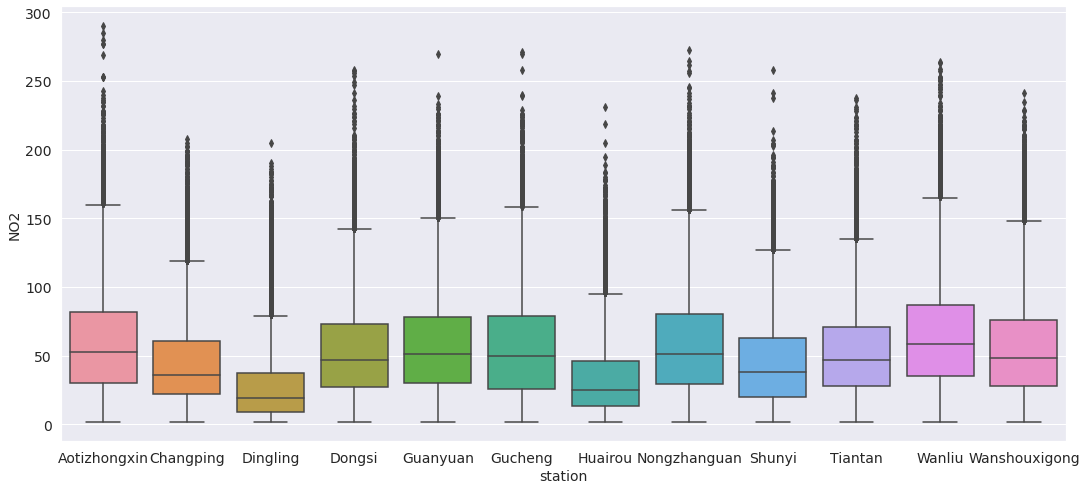

In [29]:
sns.boxplot(x="station", y="NO2", data=dataset.dropna(axis=0).reset_index())

<AxesSubplot:xlabel='station', ylabel='CO'>

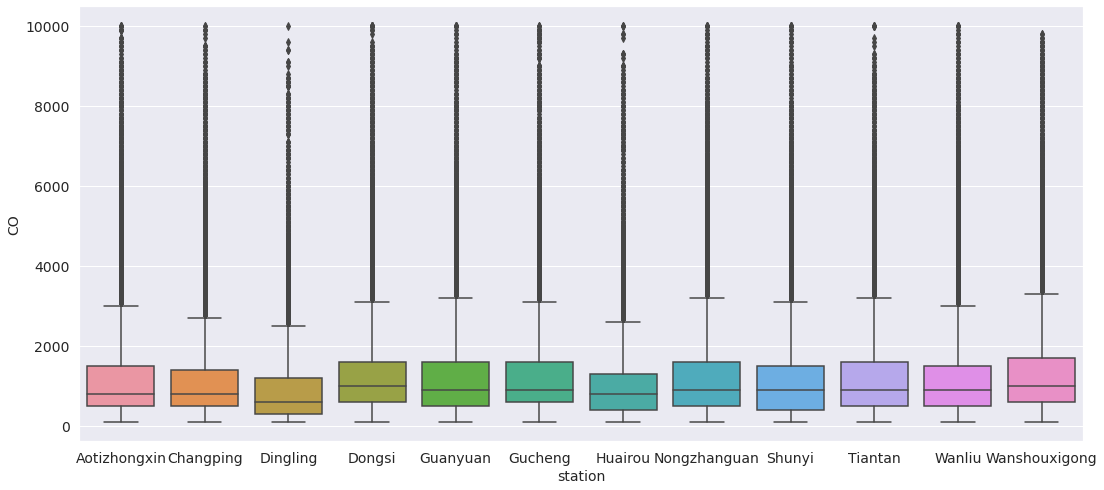

In [30]:
sns.boxplot(x="station", y="CO", data=dataset.dropna(axis=0).reset_index())

<AxesSubplot:xlabel='station', ylabel='O3'>

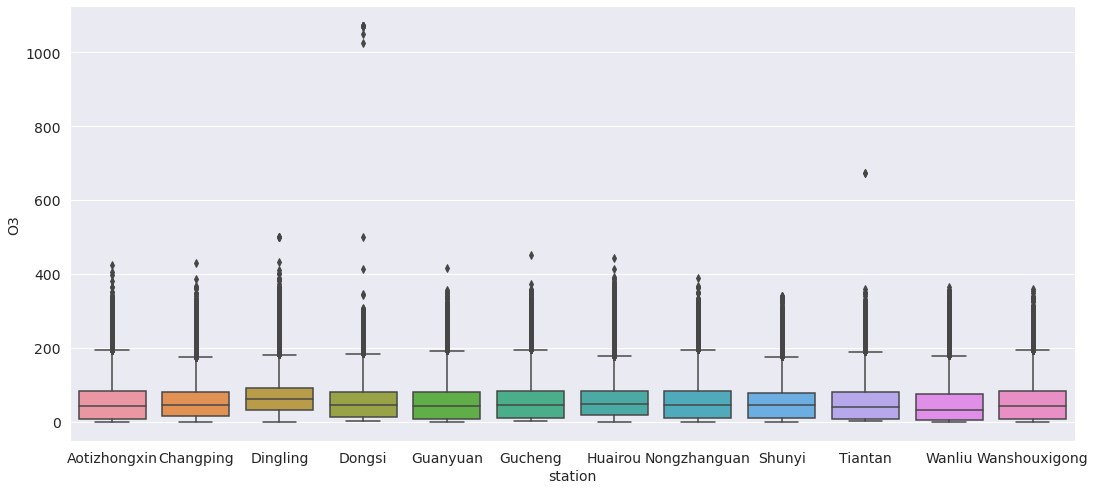

In [31]:
sns.boxplot(x="station", y="O3", data=dataset.dropna(axis=0).reset_index())

<AxesSubplot:xlabel='station', ylabel='RAIN'>

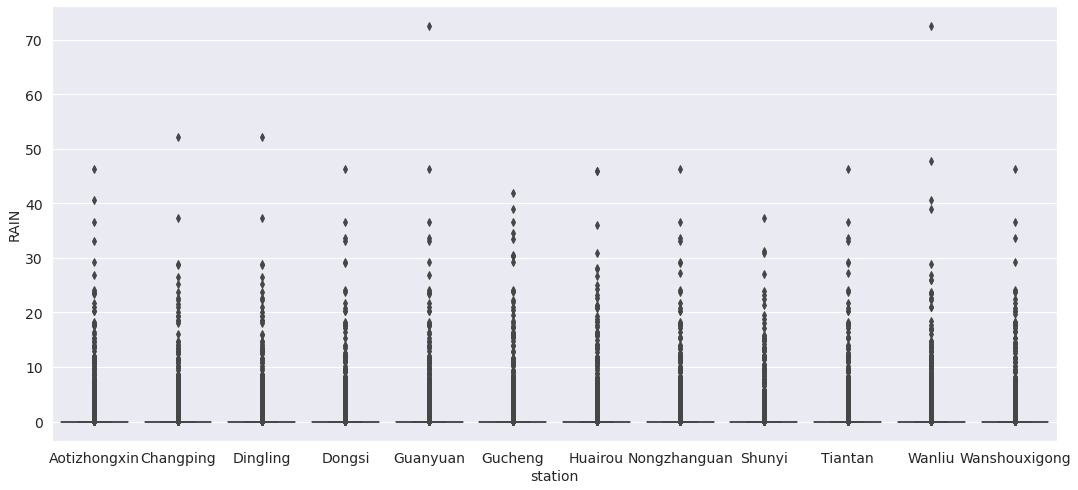

In [32]:
sns.boxplot(x="station", y="RAIN", data=dataset.dropna(axis=0).reset_index())

<a id="missing"></a>
## Missing values

In [33]:
new_air = dataset

In [34]:
new_air.isnull().sum()

year           0
month          0
day            0
hour           0
PM25        8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [35]:
new_air["PM25"].fillna(new_air["PM25"].median(), inplace=True)

In [36]:
new_air.isnull().sum()

year           0
month          0
day            0
hour           0
PM25           0
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [37]:
new_air = new_air.fillna(new_air["wd"].value_counts().index[0])

In [38]:
new_air.isnull().sum()

year       0
month      0
day        0
hour       0
PM25       0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [39]:
new_air.to_csv(f"{data_path}/cleaned_airquality.csv", index=False)